<a href="https://colab.research.google.com/github/BaishaliChetia/CapsNet-Keras/blob/master/vggTrainedMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

%load_ext tensorboard

In [ ]:
pip install -q tensorflow-model-optimization

     |████████████████████████████████| 211 kB 14.8 MB/s 


In [ ]:
import tensorflow_model_optimization as tfmot

In [ ]:
tf.random.set_seed(500000)

In [ ]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_X =[]

for i in range(train_images.shape[0]):
  train_pad = np.pad(train_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  train_X.append(train_pad)
#PADDING test images
test_X = []
for i in range(test_images.shape[0]):
  test_pad = np.pad(test_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  test_X.append(test_pad)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_X.shape, test_X.shape

((60000, 48, 48), (10000, 48, 48))

In [ ]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 48, 144), (10000, 48, 144))

In [ ]:
train_X = train_X.reshape(-1, 48,48,3)
test_X= test_X.reshape (-1,48,48,3)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X.shape,test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger
#comparison_metric = MyAccuracy()
#checkpoint_filepath = "/content/drive/MyDrive/Weights/weights-improvement-{epoch:02d}-{val_my_accuracy:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/MnistResults/vggtrain_best_weights2.hdf5",
        save_weights_only=True,
        monitor="val_accuracy",
        #monitor="val_my_accuracy_19",
        mode='max',
        save_best_only=True)
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/MnistResults/vggtrain_latest_weights2.hdf5",
        save_weights_only=True,
        monitor="val_accuracy",
        mode='max',
        save_best_only=False)
log_csv = CSVLogger("/content/drive/MyDrive/MnistResults/vggtrain_mylogs2.csv", separator = ",", append = False)
callback_list = [model_checkpoint_callback, model_checkpoint_callback2, log_csv]

In [ ]:
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
vggModel.trainable = True
model2 = keras.Sequential([
  vggModel,
  keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(50, activation = 'relu'),
  keras.layers.Dense(10, activation = 'softmax')
])
# Train the digit classification model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(
  train_X,
  train_labels,
  epochs= 50,
  validation_split=0.1, callbacks = callback_list
)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1688/1688 [==============================] - 42s 25ms/step - loss: 0.7197 - accuracy: 0.7514 - val_loss: 0.2628 - val_accuracy: 0.9375
Epoch 2/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.2116 - accuracy: 0.9497 - val_loss: 0.0822 - val_accuracy: 0.9818
Epoch 3/50
1688/1688 [==============================] - 41s 25ms/step - loss: 0.3983 - accuracy: 0.8934 - val_loss: 0.0929 - val_accuracy: 0.9775
Epoch 4/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.1197 - accuracy: 0.9715 - val_loss: 0.0596 - val_accuracy: 0.9857
Epoch 5/50
1688/1688 [==============================] - 41s 25ms/step - loss: 0.0997 - accuracy: 0.9773 - val_loss: 0.0849 - val_accuracy: 0.9852
Epoch 6/50
1688/1688 [==============================] - 41s 25ms/step - loss: 0.0940 - accuracy: 0.9796 - val_loss: 0.0586 - val_accuracy: 0.9865
Epoch 7/50
1688/1688 [==============================] - 41s 25ms/step - loss: 0.1063 - accuracy: 0.9764 - val_loss: 0.0605 - val_accura

In [ ]:
_, baseline_model_accuracy = model2.evaluate(
    test_X, test_labels, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.1161 - accuracy: 0.9822


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 14,859,376
Trainable params: 14,859,376
Non-trainable params: 0
__________________________________________

In [ ]:
vggfine_baseModel = model2.save("/content/drive/MyDrive/MnistResults/vggtrain_save_basemodel2.tf", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vggtrain_save_basemodel2.tf/assets


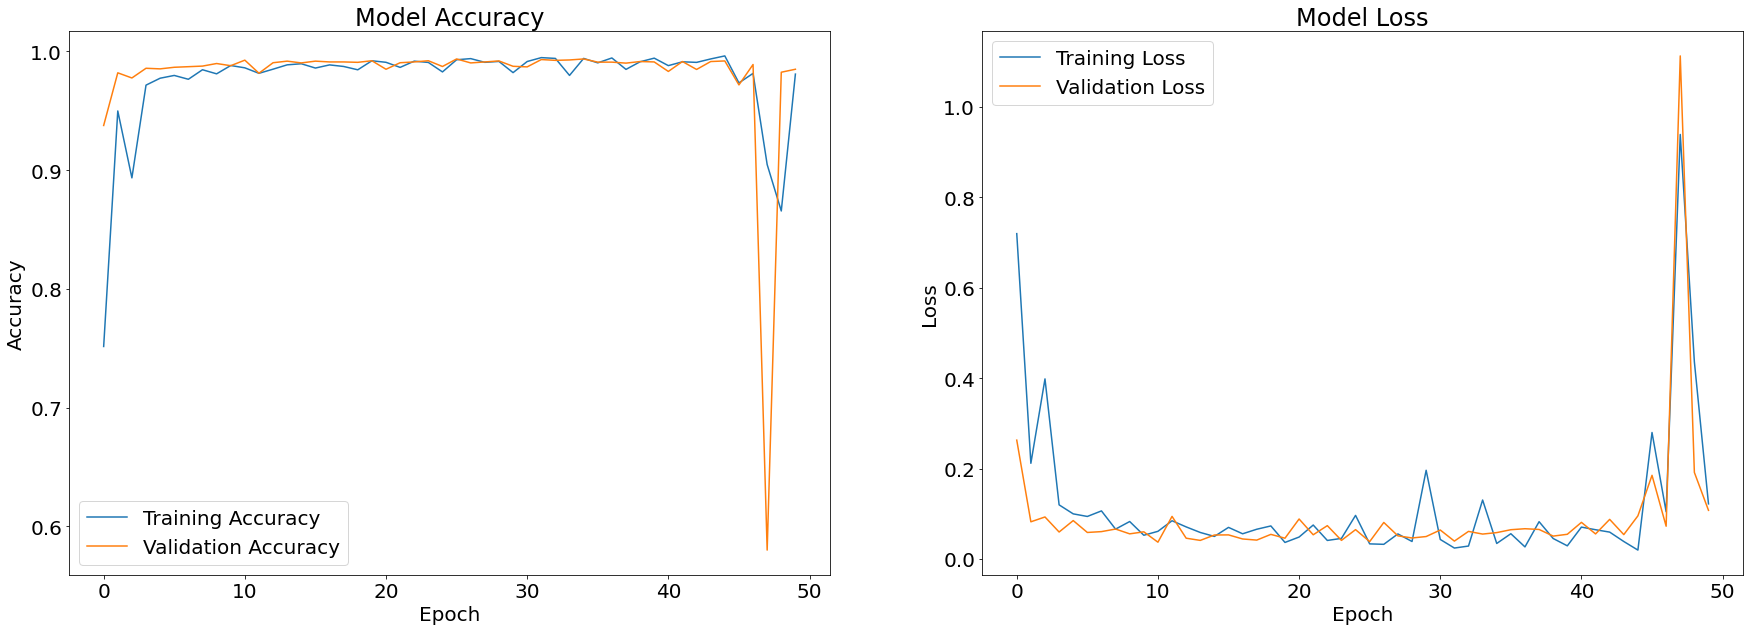

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(1, 2)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

finalSparsity = 0.05
list_accuracy0 = []
while finalSparsity <= 0.95:
  model2.load_weights('/content/drive/MyDrive/MnistResults/vggtrain_best_weights2.hdf5')
  pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.0,
                                                                final_sparsity=finalSparsity,
                                                                begin_step=0,
                                                                end_step=end_step)
  }
  
  # Define model for pruning.
  model_for_pruning = prune_low_magnitude(model2, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  model_for_pruning.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  #model_for_pruning.summary()
  logdir = tempfile.mkdtemp()

  callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
  ]

  model_for_pruning.fit(train_X, train_labels,
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                    callbacks=callbacks)
  _, model_for_pruning_accuracy = model_for_pruning.evaluate(
   test_X, test_labels, verbose=0)
  print(f'Pruned test accuracy at final_sparsity: at {finalSparsity} is {model_for_pruning_accuracy}')
  list_accuracy0.append(model_for_pruning_accuracy)
  finalSparsity += 0.05
print(list_accuracy0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 39s 75ms/step - loss: 0.0324 - accuracy: 0.9951 - val_loss: 0.0825 - val_accuracy: 0.9900
Epoch 2/2
422/422 [==============================] - 30s 71ms/step - loss: 0.0277 - accuracy: 0.9948 - val_loss: 0.0495 - val_accuracy: 0.9910
Pruned test accuracy at final_sparsity: at 0.05 is 0.9876999855041504
Epoch 1/2
422/422 [==============================] - 37s 74ms/step - loss: 0.0297 - accuracy: 0.9949 - val_loss: 0.0475 - val_accuracy: 0.9942
Epoch 2/2
422/422 [==============================] - 30s 70ms/step - loss: 0.0366 - accuracy: 0.9950 - val_loss: 0.0343 - val_accuracy: 0.9945
Pruned test accuracy at final_sparsity: at 0.1 is 0.9919999837875366
Epoch 1/2
422/422 [==============================] - 37s 73ms/step - loss: 0.0338 - accuracy: 0.9946 - val_loss: 0.0412 - val_accuracy: 0.9928
Epoch 2/2
422/422 [==============================] - 30s 70ms/step - loss: 0.0143 - accuracy: 0.9972 - val_loss: 0.0548 - val_accuracy: 0.9937
Pruned test a

In [ ]:
print(list_accuracy0)
print(len(list_accuracy0))

[0.9876999855041504, 0.9919999837875366, 0.9933000206947327, 0.9922000169754028, 0.9919000267982483, 0.9886000156402588, 0.989799976348877, 0.9724000096321106, 0.9919999837875366, 0.991100013256073, 0.9921000003814697, 0.991100013256073, 0.987500011920929, 0.9915000200271606, 0.9861999750137329, 0.9876000285148621, 0.9890000224113464, 0.9810000061988831]
18


In [ ]:
model1 =  keras.models.load_model("/content/drive/MyDrive/MnistResults/vggtrain_save_basemodel2.tf")
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 14,859,376
Trainable params: 14,859,376
Non-trainable params: 0
__________________________________________

In [ ]:

def prune_all_sparsity(initial, final):
  finalSparsity = final 
  initialSparsity = initial
  list_accuracy = []
  

  while finalSparsity <= 0.95:
    model1.load_weights('/content/drive/MyDrive/MnistResults/vggtrain_best_weights2.hdf5')
    pruning_params = {
          'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity= initialSparsity,
                                                                  final_sparsity=finalSparsity,
                                                                  begin_step=0,
                                                                  end_step=end_step)
    }
    
    # Define model for pruning.
    model_for_pruning = prune_low_magnitude(model1, **pruning_params)

    # `prune_low_magnitude` requires a recompile.
    model_for_pruning.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    #model_for_pruning.summary()
    logdir = tempfile.mkdtemp()

    callbacks = [
      tfmot.sparsity.keras.UpdatePruningStep(),
      tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
    ]

    model_for_pruning.fit(train_X, train_labels,
                      batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                      callbacks=callbacks)
    _, model_for_pruning_accuracy = model_for_pruning.evaluate(
    test_X, test_labels, verbose=0)
    print(f'Pruned test accuracy at final_sparsity: at {finalSparsity} is {model_for_pruning_accuracy}')
    list_accuracy.append(model_for_pruning_accuracy)
    finalSparsity += 0.05
  print(list_accuracy)
  return list_accuracy

# call prune_all_sparsity for different initial sparsities
initial= 0.0 

while initial <= 0.50:
  print(f"Pruniing for initial sparsity: {initial}")
  final = 0.55
  prune_result = prune_all_sparsity(initial, final )
  print(f"accuracy list at {initial} sparsity is {prune_result}")
  initial += 0.10

print(f"final 60: {accuracy60}")
print(f"final 65: {accuracy65}")
print(f"final 70: {accuracy70}")
print(f"final 75: {accuracy75}")
print(f"final 80: {accuracy80}")
print(f"final 85: {accuracy85}")
print(f"final 90: {accuracy90}")


Pruniing for initial sparsity: 0.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 37s 74ms/step - loss: 0.0523 - accuracy: 0.9887 - val_loss: 0.0670 - val_accuracy: 0.9875
Epoch 2/2
422/422 [==============================] - 30s 70ms/step - loss: 0.1033 - accuracy: 0.9703 - val_loss: 0.0388 - val_accuracy: 0.9922
Pruned test accuracy at final_sparsity: at 0.55 is 0.9904000163078308
Epoch 1/2
422/422 [==============================] - 38s 75ms/step - loss: 0.1358 - accuracy: 0.9596 - val_loss: 0.2339 - val_accuracy: 0.8935
Epoch 2/2
422/422 [==============================] - 30s 71ms/step - loss: 0.2398 - accuracy: 0.9218 - val_loss: 0.0548 - val_accuracy: 0.9917
Pruned test accuracy at final_sparsity: at 0.6000000000000001 is 0.9890999794006348
Epoch 1/2
422/422 [==============================] - 36s 74ms/step - loss: 0.1312 - accuracy: 0.9609 - val_loss: 0.5030 - val_accuracy: 0.8533
Epoch 2/2
422/422 [==============================] - 30s 71ms/step - loss: 0.2147 - accuracy: 0.9456 - val_loss: 0.0971 - val_accuracy: 0.992

In [ ]:
model1 =  keras.models.load_model("/content/drive/MyDrive/MnistResults/vggtrain_save_basemodel2.tf")
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 14,859,376
Trainable params: 14,859,376
Non-trainable params: 0
__________________________________________

In [ ]:


prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

model1.load_weights('/content/drive/MyDrive/MnistResults/vggtrain_best_weights2.hdf5')
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.5,
                                                              final_sparsity= 0.80,
                                                              begin_step=0,
                                                              end_step=end_step)
}

# Define model for pruning.
model_for_pruning = prune_low_magnitude(model1, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model_for_pruning.summary()
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(train_X, train_labels,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
  test_X, test_labels, verbose=1)




/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 52s 73ms/step - loss: 0.4732 - accuracy: 0.8126 - val_loss: 0.0502 - val_accuracy: 0.9885
Epoch 2/2
313/313 [==============================] - 3s 10ms/step - loss: 0.0576 - accuracy: 0.9894


In [ ]:
model_for_pruning.save("/content/drive/MyDrive/MnistResults/vggtrain_pruned_model2.tf")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vggtrain_pruned_model2.tf/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vggtrain_pruned_model2.tf/assets


In [ ]:
print(model_for_pruning_accuracy )

0.9894000291824341


In [ ]:
model1.load_weights('/content/drive/MyDrive/MnistResults/vggtrain_best_weights2.hdf5')

In [ ]:
model1.evaluate(
    test_X, test_labels, verbose=1)

  7/313 [..............................] - ETA: 2s - loss: 0.0379 - accuracy: 0.9955 

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 3s 9ms/step - loss: 0.0418 - accuracy: 0.9918


[0.041753433644771576, 0.9918000102043152]

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: /tmp/tmpybc1_l7r.h5


In [ ]:
model_for_export.save("/content/drive/MyDrive/MnistResults/vggtrain_prunedStripped_basemodel2.tf")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vggtrain_prunedStripped_basemodel2.tf/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vggtrain_prunedStripped_basemodel2.tf/assets


In [ ]:
model_for_export.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 14,859,376
Trainable params: 14,859,376
Non-trainable params: 0
__________________________________________

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmplrattdub/assets


INFO:tensorflow:Assets written to: /tmp/tmplrattdub/assets


Saved pruned TFLite model to: /tmp/tmplwvuqafp.tflite


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

INFO:tensorflow:Assets written to: /tmp/tmpyv79rtqo/assets


INFO:tensorflow:Assets written to: /tmp/tmpyv79rtqo/assets


Saved quantized and pruned TFLite model to: /tmp/tmprfwuiyfk.tflite
Size of gzipped pruned and quantized TFlite model: 11395017.00 bytes


In [ ]:
quantized_and_pruned_tflite_model.save("/content/drive/MyDrive/MnistResults/vggtrain_Q&P_model2.tflite")

AttributeError: ignored

In [ ]:
!du -sh /content/drive/MyDrive/MnistResults/*

27M	/content/drive/MyDrive/MnistResults/best_weights4.hdf5
27M	/content/drive/MyDrive/MnistResults/best_weights5.hdf5
95K	/content/drive/MyDrive/MnistResults/cnn_best_weights4.hdf5
95K	/content/drive/MyDrive/MnistResults/cnn_latest_weights4.hdf5
1.0K	/content/drive/MyDrive/MnistResults/cnn_mylogs4.csv
367K	/content/drive/MyDrive/MnistResults/cnn_save_basemodel4.tf
11M	/content/drive/MyDrive/MnistResults/compressed1.tflite
21M	/content/drive/MyDrive/MnistResults/dense_best_weights1.hdf5
21M	/content/drive/MyDrive/MnistResults/dense_latest_weights1.hdf5
4.0K	/content/drive/MyDrive/MnistResults/dense_mylogs1.csv
27M	/content/drive/MyDrive/MnistResults/latest_weights1.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights2.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights3.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights4.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights5.hdf5
512	/content/drive/MyDrive/MnistResults/mylogs1.csv
512	/content/drive/MyDrive

In [ ]:
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on ever y image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_X[:10]):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels[:10]).mean()
  return accuracy

In [ ]:
interpreter = tf.lite.Interpreter(model_content=quantized_and_pruned_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Pruned and quantized TFLite test_accuracy:', test_accuracy)
print('Pruned TF test accuracy:', model_for_pruning_accuracy)

Evaluated on 0 results so far.


Pruned and quantized TFLite test_accuracy: 1.0
Pruned TF test accuracy: 0.9894000291824341
